# Gravitational Orbits with 3 Bodies

Created 4-23-19 by Lucas Nestor  
Revised 4-23-19 by Lucas Nestor

We have seen the orbits of two masses interacting, and in this notebook we will expand this to three masses. Once again, Lagrangian mechanics is the method of choice. The energies are given by the following.

$\quad T = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_2^2 + \dot y_2^2) + \frac{1}{2} m_3 (\dot x_3^2 + \dot y_3^2)$

$\quad U = -\frac{G m_1 m_2}{\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}} - \frac{G m_1 m_3}{\sqrt{(x_1 - x_3)^2 + (y_1 - y_3)^2}} - \frac{G m_2 m_3}{\sqrt{(x_2 - x_3)^2 + (y_2 - y_3)^2}}$

Solving for the equations of motion yields the following:

$\quad m_1 \ddot x_1 = - \frac{G m_1 m_2 (x_1 - x_2)}{|r_{12}|^3} - \frac{G m_1 m_3 (x_1 - x_3)}{|r_{13}|^3}$

$\quad m_1 \ddot y_1 = - \frac{G m_1 m_2 (y_1 - y_2)}{|r_{12}|^3} - \frac{G m_1 m_3 (y_1 - y_3)}{|r_{13}|^3}$

$\quad m_2 \ddot x_2 = \frac{G m_1 m_2 (x_1 - x_2)}{|r_{12}|^3} - \frac{G m_2 m_3 (x_2 - x_3)}{|r_{23}|^3}$

$\quad m_2 \ddot y_2 = \frac{G m_1 m_2 (y_1 - y_2)}{|r_{12}|^3} - \frac{G m_2 m_3 (y_2 - y_3)}{|r_{23}|^3}$

$\quad m_3 \ddot x_3 = \frac{G m_1 m_3 (x_1 - x_3)}{|r_{13}|^3} + \frac{G m_2 m_3 (x_2 - x_3)}{|r_{23}|^3}$

$\quad m_3 \ddot y_3 = \frac{G m_1 m_3 (y_1 - y_3)}{|r_{13}|^3} + \frac{G m_2 m_3 (y_2 - y_3)}{|r_{23}|^3}$

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
class ThreeBodyOrbit():
    def __init__(self, m1=1., m2=1., m3=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
    
    def rel_dist(self, x1, y1, x2, y2):
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    def dy_dt(self, t, y):
        x1, y1, x2, y2, x3, y3 = y[0:6]
        r12 = self.rel_dist(x1, y1, x2, y2)
        r13 = self.rel_dist(x1, y1, x3, y3)
        r23 = self.rel_dist(x2, y2, x3, y3)
        
        dy_dt_vec = np.zeros(12)
        dy_dt_vec[0:6] = y[6:12]
        dy_dt_vec[6]  = self.G * (self.m2 * (x2 - x1) / r12**3 + self.m3 * (x3 - x1) / r13**3)
        dy_dt_vec[7]  = self.G * (self.m2 * (y2 - y1) / r12**3 + self.m3 * (y3 - y1) / r13**3)
        dy_dt_vec[8]  = self.G * (self.m1 * (x1 - x2) / r12**3 + self.m3 * (x3 - x2) / r23**3)
        dy_dt_vec[9]  = self.G * (self.m1 * (y1 - y2) / r12**3 + self.m3 * (y3 - y2) / r23**3)
        dy_dt_vec[10] = self.G * (self.m1 * (x1 - x3) / r13**3 + self.m2 * (x2 - x3) / r23**3)
        dy_dt_vec[11] = self.G * (self.m1 * (y1 - y3) / r13**3 + self.m2 * (y2 - y3) / r23**3)
        
        return dy_dt_vec

    def solve_ode(self, t_pts, y_0, abserr=1.0e-10, relerr=1.0e-10):
        return solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y_0, t_eval=t_pts, atol=abserr, rtol=relerr).y

## Various Orbits

Like we did in the two body problem, we'll examine some three body orbits.

In [85]:
def build_title(masses, initial_conditions):
    m1, m2, m3 = masses
    x1, y1, x2, y2, x3, y3, _, _, _, _, _, _ = initial_conditions
    title = 'Triple Orbit\n' + \
        rf'Mass 1 - $m_1 = {m1:.2f},\quad x_1(0) = {x1:.1f},\quad y_1(0) = {y1:.1f}$' + '\n' + \
        rf'Mass 2 - $m_2 = {m2:.2f},\quad x_1(0) = {x2:.1f},\quad y_2(0) = {y2:.1f}$' + '\n' + \
        rf'Mass 2 - $m_3 = {m3:.2f},\quad x_1(0) = {x3:.1f},\quad y_3(0) = {y3:.1f}$'
    return title

def plot_orbit(orbit, t_pts, initial_conditions, title=None):
    x1, y1, x2, y2, x3, y3, _, _, _, _, _, _ = orbit.solve_ode(t_pts, initial_conditions)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(x1, y1, label=r'$m_1$')
    ax.plot(x2, y2, label=r'$m_2$')
    ax.plot(x3, y3, label=r'$m_3$')
    
    data_x = np.concatenate((x1, x2, x3))
    data_y = np.concatenate((y1, y2, y3))
    upper_xlim = max(data_x)
    lower_xlim = min(data_x)
    upper_ylim = max(data_y)
    lower_ylim = min(data_y)
        
    gap_percent = .1
    gap_x = gap_percent * (upper_xlim - lower_xlim)
    gap_y = gap_percent * (upper_ylim - lower_ylim)
        
    ax.set_xlim(lower_xlim - gap_x, upper_xlim + gap_x)
    ax.set_ylim(lower_ylim - gap_y, upper_ylim + gap_y)
    #ax.set_aspect(1)
    
    ax.legend(loc='lower left')
    
    if title: ax.set_title(title)

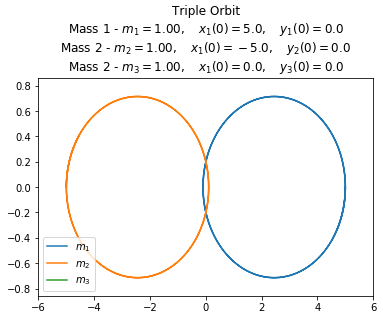

In [86]:
m1 = m2 = m3 = 1.
y1_0 = y2_0 = y3_0 = 0
x1_dot_0 = x2_dot_0 = x3_dot_0 = 0

x1_0 = 5
x2_0 = -5
x3_0 = 0

y1_dot_0 = -.1
y2_dot_0 = .1
y3_dot_0 = (-m1 * x1_dot_0 - m2 * x2_dot_0) / m3

initial_conditions = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, x3_dot_0, y3_dot_0]
t_pts = np.arange(0., 50., 0.01)
orbit = ThreeBodyOrbit(m1=m1, m2=m2, m3=m3)

title = build_title([m1, m2, m3], initial_conditions)
plot_orbit(orbit, t_pts, initial_conditions, title=title)

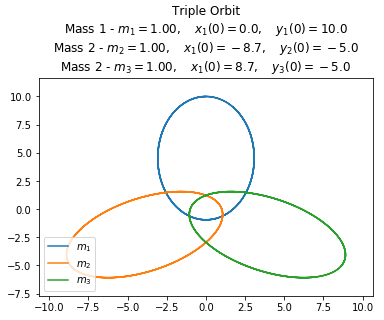

In [87]:
m1 = m2 = m3 = 1.

radius = 10

deg_60 = 60 * np.pi / 180
deg_30 = 30 * np.pi / 180

x1_0 = 0
y1_0 = radius
x2_0 = -radius * np.cos(deg_30)
y2_0 = -radius * np.sin(deg_30)
x3_0 = radius * np.cos(deg_30)
y3_0 = -radius * np.sin(deg_30)

v_0 = .1
x1_dot_0 = -v_0
y1_dot_0 = 0
x2_dot_0 = v_0 * np.cos(deg_60)
y2_dot_0 = -v_0 * np.sin(deg_60)
x3_dot_0 = v_0 * np.cos(deg_60)
y3_dot_0 = v_0 * np.sin(deg_60)

initial_conditions = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, x3_dot_0, y3_dot_0]
t_pts = np.arange(0., 300., .1)
orbit = ThreeBodyOrbit(m1=m1, m2=m2, m3=m3)

title = build_title([m1, m2, m3], initial_conditions)
plot_orbit(orbit, t_pts, initial_conditions, title=title)